# **Project Name**    -  E-Commerce Customer Satisfaction Score Prediction



##### **Project Type**    - Ordinal Classification
##### **Contribution**    - Individual

# **Project Summary -**

This project revolves around delving into customer satisfaction (CSAT) data through a range of machine learning methodologies. The dataset encompasses a multitude of features pertinent to customer interactions, spanning from channel names and categories to tenure buckets, agent shifts, and CSAT scores. Initially, I meticulously preprocess the data, addressing missing values, eliminating irrelevant columns, and adjusting data types as needed.

Following this preparatory phase, I embark on an exploratory data analysis (EDA) journey to extract valuable insights into feature distributions and correlations. Leveraging an arsenal of visual aids like histograms, box plots, and correlation heatmaps, I navigate through the data landscape to unearth patterns and relationships.

Transitioning to the modeling phase, I deploy a diverse set of machine learning algorithms tailored for classification tasks. This includes the implementation of Decision Tree and Artificial Neural Network (ANN) classifiers. Throughout the classification process, I rigorously evaluate model performance, employing metrics such as accuracy, precision, recall, and F1-score, alongside comprehensive classification reports. Additionally, I fine-tune model parameters using advanced techniques like grid search or random search, particularly optimizing models like random forest classification.

Subsequent evaluations of model performance are conducted using an array of appropriate metrics to ascertain predictive accuracy and generalization capabilities. Drawing upon the insights gleaned from model performance and analysis outcomes, I formulate actionable recommendations aimed at amplifying customer satisfaction. These recommendations may encompass strategies for refining service channels, enhancing issue resolution mechanisms, or bolstering agent training protocols. Moreover, I identify avenues for further optimization, which may involve feature engineering, data balancing techniques, or model refinement strategies, all geared towards elevating the overall customer experience and satisfaction levels.

# **GitHub Link -**

https://github.com/Satyam-G-Kulkarni/E-Commerce-Customer-Satisfaction-Score-Prediction

# **Problem Statement**


To develop a deep learning model that accurately predicts Customer Satisfaction (CSAT) scores based on customer interactions and feedback in an e-commerce context. This project seeks to enable real-time monitoring and enhancement of service quality and customer loyalty by leveraging advanced neural network models to forecast CSAT scores from a variety of interaction-related features.

**Objectives**

**Data Preparation:** Clean and preprocess the dataset to ensure its suitability for training a deep learning model.

**Feature Engineering:** Identify and engineer the most predictive features from the dataset that influence CSAT scores.

**Model Development:** Design and train a deep learning Artificial Neural Network (ANN) model capable of predicting CSAT scores accurately.

**Evaluation:** Evaluate the model's performance using appropriate metrics and validate its predictive accuracy.

**Insight Generation:** Analyze the model's predictions to uncover trends, patterns, and actionable insights for service improvement.

**Deployment:** Implement the model in a real-world setting to provide ongoing predictions and insights into customer satisfaction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install tensorflow

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

<ipython-input-4-cebde045296b>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [ ]:
# Load Dataset
url = 'https://raw.githubusercontent.com/Satyam-G-Kulkarni/E-Commerce-Customer-Satisfaction-Score-Prediction/main/eCommerce_Customer_support_data.csv'
data = pd.read_csv(url)

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(85907, 20)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_rows = data.duplicated()

print("Duplicate rows:")
print(data[duplicate_rows])

Duplicate rows:
Empty DataFrame
Columns: [Unique id, channel_name, category, Sub-category, Customer Remarks, Order_id, order_date_time, Issue_reported at, issue_responded, Survey_response_Date, Customer_City, Product_category, Item_price, connected_handling_time, Agent_name, Supervisor, Manager, Tenure Bucket, Agent Shift, CSAT Score]
Index: []


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

<Axes: >

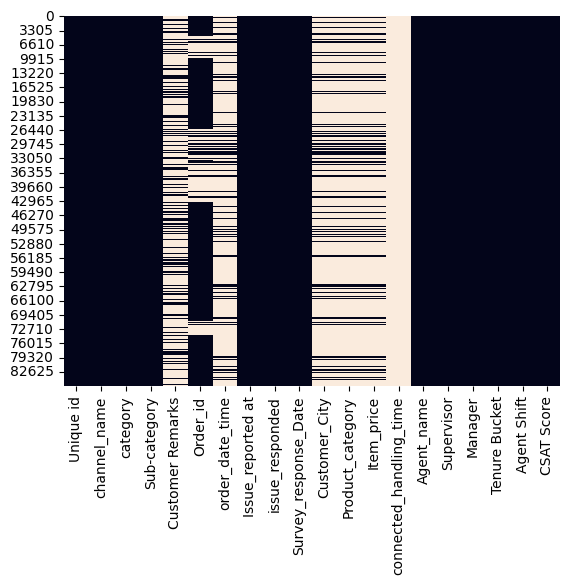

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

Above provided dataset encompasses customer satisfaction scores over a one-month period on an e-commerce platform named "Shopzilla. It has 85907 rows and 20 columns.Dataset mostly contains object datatypes except having 2 floats and 1 integer type data.

There are no duplicate rows in dataset but it has features or columns with null values. Total of 7 columns contains null values hence this variables need to be handled before procceding further.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

Unique id: Unique identifier for each record (integer).

Channel name: Name of the customer service channel (object/string).

Category: Category of the interaction (object/string).

Sub-category: Sub-category of the interaction (object/string).

Customer Remarks: Feedback provided by the customer (object/string).

Order id: Identifier for the order associated with the interaction (integer).

Order date time: Date and time of the order (datetime).

Issue reported at: Timestamp when the issue was reported (datetime).

Issue responded: Timestamp when the issue was responded to (datetime).

Survey response date: Date of the customer survey response (datetime).

Customer city: City of the customer (object/string).

Product category: Category of the product (object/string).

Item price: Price of the item (float).

Connected handling time: Time taken to handle the interaction (float).

Agent name: Name of the customer service agent (object/string).

Supervisor: Name of the supervisor (object/string).

Manager: Name of the manager (object/string).

Tenure Bucket: Bucket categorizing agent tenure (object/string).

Agent Shift: Shift timing of the agent (object/string).

CSAT Score: Customer Satisfaction (CSAT) score (integer).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
data.drop(columns=['Unique id', 'Order_id'], inplace=True)

In [ ]:
# Write your code to make your dataset analysis ready.
#checking percentage of null values in each column
round(100*(data.isnull().sum()/len(data.index)), 2)

channel_name                0.00
category                    0.00
Sub-category                0.00
Customer Remarks           66.54
order_date_time            79.96
Issue_reported at           0.00
issue_responded             0.00
Survey_response_Date        0.00
Customer_City              80.12
Product_category           79.98
Item_price                 79.97
connected_handling_time    99.72
Agent_name                  0.00
Supervisor                  0.00
Manager                     0.00
Tenure Bucket               0.00
Agent Shift                 0.00
CSAT Score                  0.00
dtype: float64

In [ ]:
# Correct code to drop columns with more than 65% NA values
data = data.drop(columns=[col for col in data.columns if (data[col].isnull().sum() / len(data)) * 100 > 65])


In [ ]:
data['CSAT Score'].unique()

array([5, 4, 1, 3, 2])

In [ ]:
data['channel_name'].unique()

array(['Outcall', 'Inbound', 'Email'], dtype=object)

In [ ]:
data.head()

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,Outcall,Product Queries,Life Insurance,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,Inbound,Order Related,Installation/demo,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,Inbound,Returns,Reverse Pickup Enquiry,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,Inbound,Cancellation,Not Needed,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
# Convert the specified columns to datetime
data['Issue_reported at'] = pd.to_datetime(data['Issue_reported at'], format='%d/%m/%Y %H:%M')
data['issue_responded'] = pd.to_datetime(data['issue_responded'], format='%d/%m/%Y %H:%M')
data['Survey_response_Date'] = pd.to_datetime(data['Survey_response_Date'], errors='coerce')

# Display the data types to verify the changes
print(data.dtypes)

channel_name                    object
category                        object
Sub-category                    object
Issue_reported at       datetime64[ns]
issue_responded         datetime64[ns]
Survey_response_Date    datetime64[ns]
Agent_name                      object
Supervisor                      object
Manager                         object
Tenure Bucket                   object
Agent Shift                     object
CSAT Score                       int64
dtype: object


In [ ]:
# Calculate the difference in days between 'issue_responded' and 'Issue_reported at'
data['issue_resolution_days'] = (data['issue_responded'] - data['Issue_reported at']).dt.days

In [ ]:
data['Survey_gap_days'] = (data['Survey_response_Date'] - data['Issue_reported at']).dt.days

In [ ]:
count_negative = (data['issue_resolution_days'] < 0).sum()
print("Number of negative values:", count_negative)

Number of negative values: 3128


In [ ]:
count_negative = (data['Survey_gap_days'] < 0).sum()
print("Number of negative values:", count_negative)

Number of negative values: 78067


### What all manipulations have you done and insights you found?

1) Removed columns containing Id's as they are not relevent for this analysis.

2) Removed columns containing null values more than 65% of total data, as imputing such columns would cause change in actual results.

3) Converted all the date related columns in datetime datatype format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Average CSAT Score for each Channel name

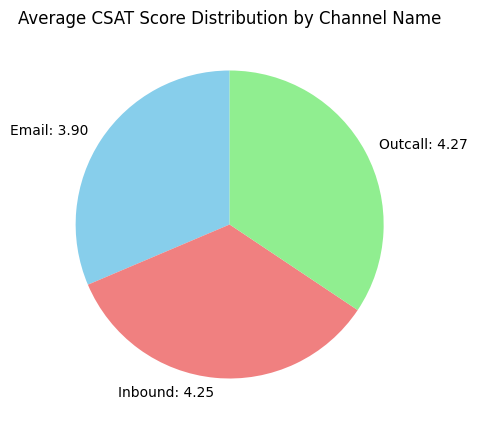

In [ ]:
# Chart - 1 visualization code
# Calculate the average CSAT Score by channel_name
Score_by_channel = data.groupby('channel_name')['CSAT Score'].mean().reset_index()

# Create labels with both channel_name and average CSAT score
labels = [f'{row["channel_name"]}: {row["CSAT Score"]:.2f}' for _, row in Score_by_channel.iterrows()]

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(Score_by_channel['CSAT Score'], labels=labels, startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink', 'lightgrey'])
plt.title('Average CSAT Score Distribution by Channel Name')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are better suited to visualise small number of categories

##### 2. What is/are the insight(s) found from the chart?

channel_name outcall has highest average of CSAT Score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, It shows that customer representative proactively calls to customer then customers are more satisfied with customer service.

#### Chart - 2 - Average CSAT Score for each category

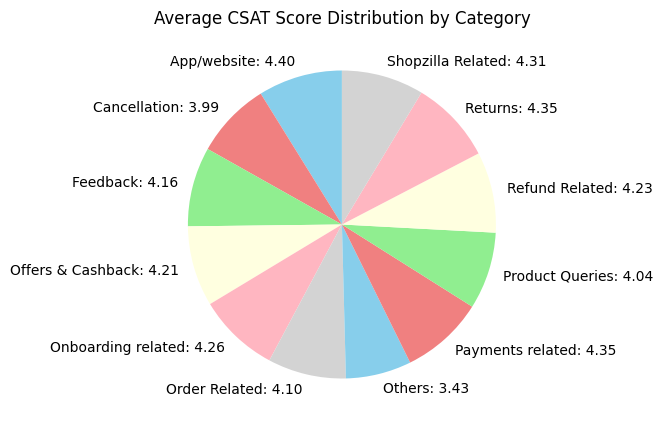

In [ ]:
# Chart - 2 visualization code
# Calculate the average CSAT Score by category
Score_by_category = data.groupby('category')['CSAT Score'].mean().reset_index()

# Create labels with both category and average CSAT score
labels = [f'{row["category"]}: {row["CSAT Score"]:.2f}' for _, row in Score_by_category.iterrows()]

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(Score_by_category['CSAT Score'], labels=labels, startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink', 'lightgrey'])
plt.title('Average CSAT Score Distribution by Category')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are suitable to visualise distribution of numerical variable across categories.

##### 2. What is/are the insight(s) found from the chart?

App/website category have higher CSAT Score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, This insights not much useful for business.

#### Chart - 3 - Average CSAT Score by Subcategory

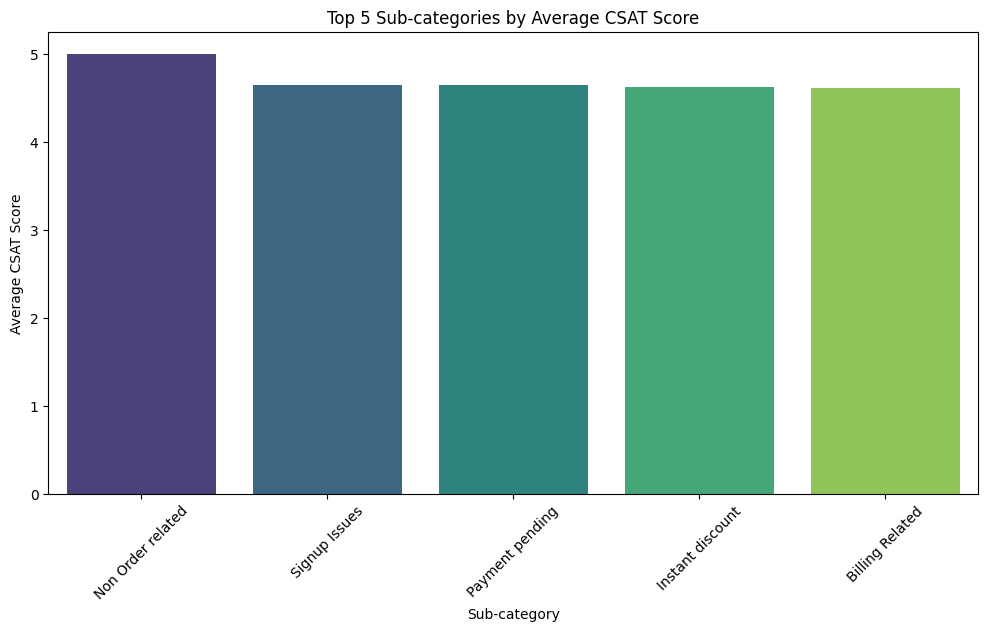

In [ ]:
# Chart - 3 visualization code
# Calculate the average CSAT Score by Sub-category
Score_by_subcategory = data.groupby('Sub-category')['CSAT Score'].mean().reset_index()

# Sort the DataFrame by CSAT Score in descending order and select the top 5 sub-categories
top_5_subcategories = Score_by_subcategory.sort_values(by='CSAT Score', ascending=False).head(5)

# Plotting the bar graph for the top 5 sub-categories
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-category', y='CSAT Score', data=top_5_subcategories, palette='viridis')
plt.title('Top 5 Sub-categories by Average CSAT Score')
plt.xlabel('Sub-category')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are better way to visualise categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Non Order related issues have higher average CSAT Score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No.

#### Chart - 4 - Average CSAT Score by No. of days it took to resolve issue

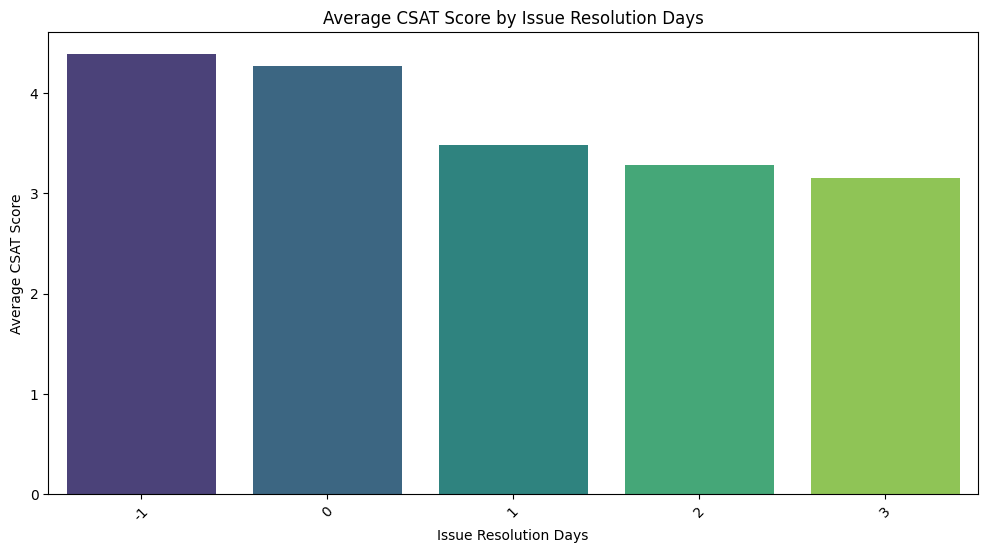

In [ ]:
# Chart - 4 visualization code

# Calculate the average CSAT Score by issue resolution days
Score_by_resolution_days = data.groupby('issue_resolution_days')['CSAT Score'].mean().reset_index()

# Plotting the bar graph for issue resolution days
plt.figure(figsize=(12, 6))
sns.barplot(x='issue_resolution_days', y='CSAT Score', data=Score_by_resolution_days, palette='viridis')
plt.title('Average CSAT Score by Issue Resolution Days')
plt.xlabel('Issue Resolution Days')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are better in visualisation of categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Issues which were resolved on same day shows higher CSAT Score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Same day issue resolution or quick issue resolution will help in better CSAT Score.

#### Chart - 5 - Average CSAT Score by Agent Name

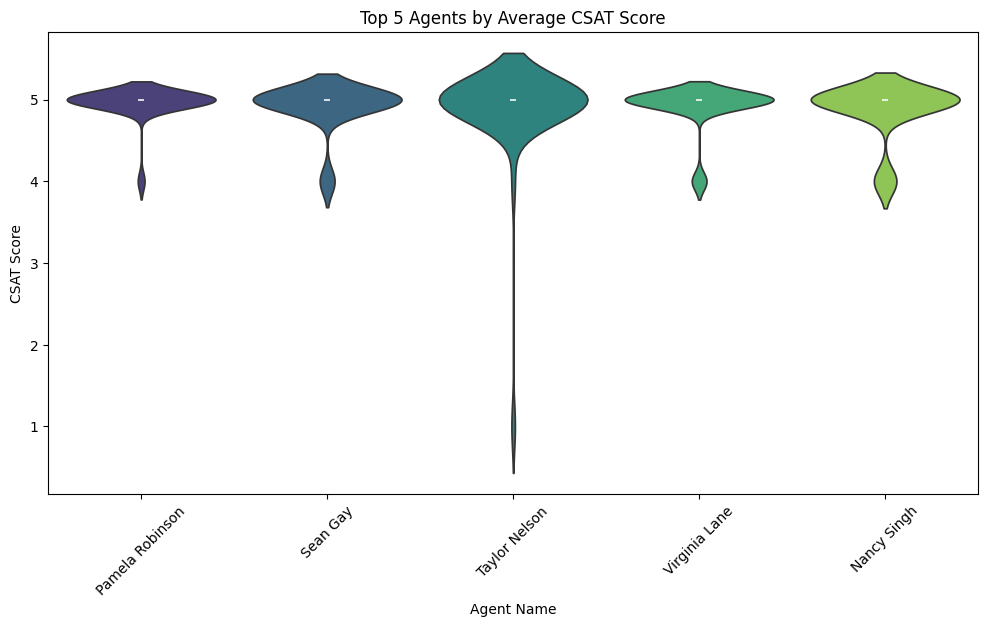

In [ ]:
# Calculate the average CSAT Score by Agent_name
Score_by_agent = data.groupby('Agent_name')['CSAT Score'].mean().reset_index()

# Sort the DataFrame by CSAT Score in descending order and select the top 5 agents
top_5_agents = Score_by_agent.sort_values(by='CSAT Score', ascending=False).head(5)

# Filter the original data to include only the top 5 agents
data_top_5_agents = data[data['Agent_name'].isin(top_5_agents['Agent_name'])]

# Plotting the violin plot for top 5 agents
plt.figure(figsize=(12, 6))
sns.violinplot(x='Agent_name', y='CSAT Score', data=data_top_5_agents, palette='viridis')
plt.title('Top 5 Agents by Average CSAT Score')
plt.xlabel('Agent Name')
plt.ylabel('CSAT Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()

##### 1. Why did you pick the specific chart?

Violin plots are better way of visualising categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Above plot shows top performing agents, this agents have helped in g etting higher CSAT Score

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Above five agents can be examples for other agents and there performance can be improved.

#### Chart - 6 - Average CSAT Score by Supervisor

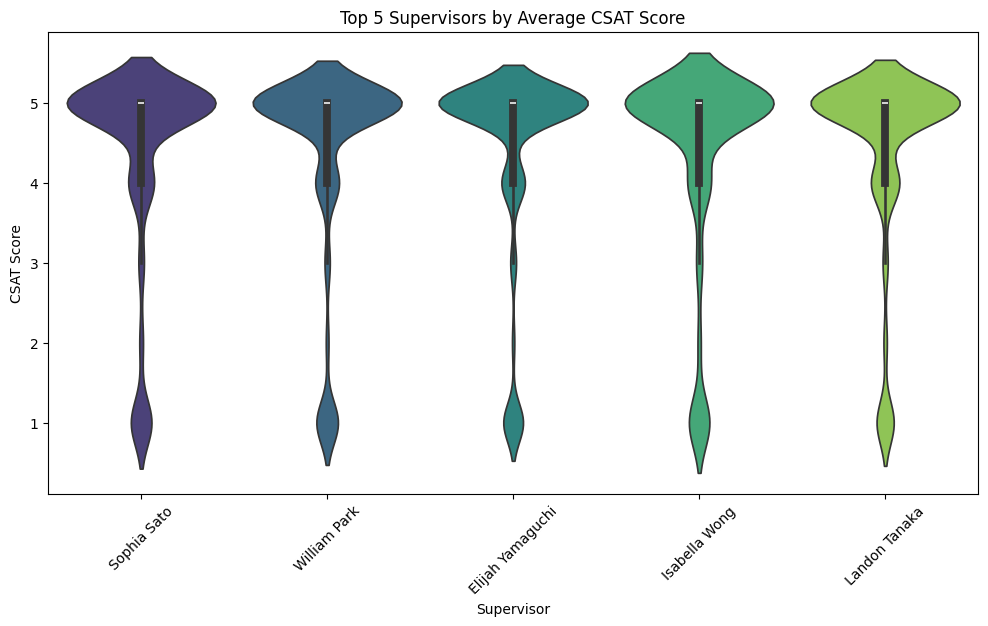

In [ ]:
# Chart - 6 visualization code
# Calculate the average CSAT Score by Supervisor
Score_by_supervisor = data.groupby('Supervisor')['CSAT Score'].mean().reset_index()

# Sort the DataFrame by CSAT Score in descending order and select the top 5 supervisors
top_5_supervisors = Score_by_supervisor.sort_values(by='CSAT Score', ascending=False).head(5)

# Filter the original data to include only the top 5 supervisors
data_top_5_supervisors = data[data['Supervisor'].isin(top_5_supervisors['Supervisor'])]

# Plotting the violin plot for top 5 supervisors
plt.figure(figsize=(12, 6))
sns.violinplot(x='Supervisor', y='CSAT Score', data=data_top_5_supervisors, palette='viridis')
plt.title('Top 5 Supervisors by Average CSAT Score')
plt.xlabel('Supervisor')
plt.ylabel('CSAT Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()

##### 1. Why did you pick the specific chart?

Violin Plots provide better way to visualise categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Above mentioned supervisors are top performing supervisors, there supervision better than other supervisors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, This can set benchmark for supervisor's performance.

#### Chart - 7 - Average CSAT Score by Manager

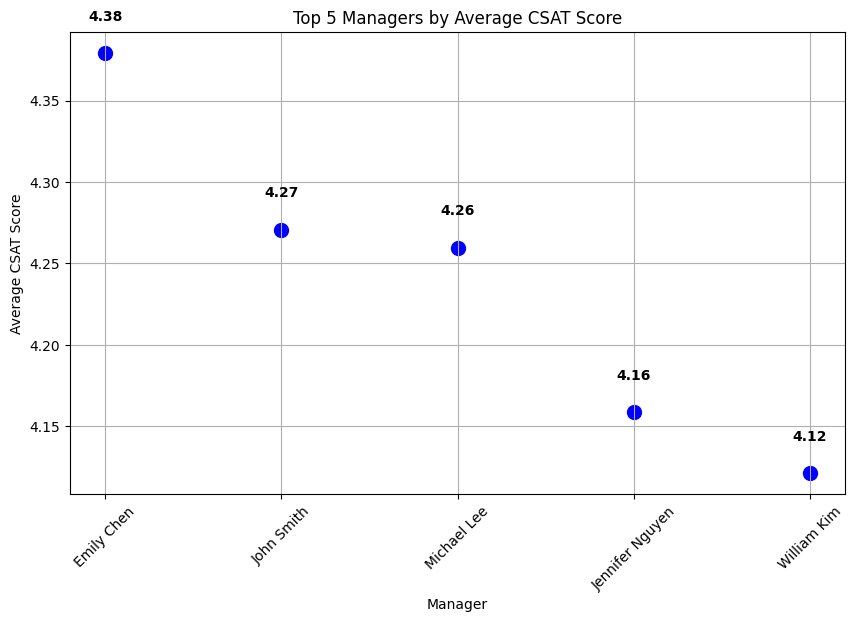

In [ ]:
# Chart - 7 visualization code
# Calculate the average CSAT Score by Manager
Score_by_manager = data.groupby('Manager')['CSAT Score'].mean().reset_index()

# Sort the DataFrame by CSAT Score in descending order and select the top 5 managers
top_5_managers = Score_by_manager.sort_values(by='CSAT Score', ascending=False).head(5)

# Plotting the scatter plot for top 5 managers
plt.figure(figsize=(10, 6))
plt.scatter(top_5_managers['Manager'], top_5_managers['CSAT Score'], color='blue', s=100)

# Adding annotations for each point
for i in range(top_5_managers.shape[0]):
    plt.text(top_5_managers['Manager'].iloc[i], top_5_managers['CSAT Score'].iloc[i] + 0.02,
             f"{top_5_managers['CSAT Score'].iloc[i]:.2f}",
             horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.title('Top 5 Managers by Average CSAT Score')
plt.xlabel('Manager')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot can be great tool to visualise distribution of data.

##### 2. What is/are the insight(s) found from the chart?

Above mentioned are top performing managers and their management skill better than others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This can be set as benchmark for performance of managers.

#### Chart - 8 - Average CSAT Score by Tenure Bucket

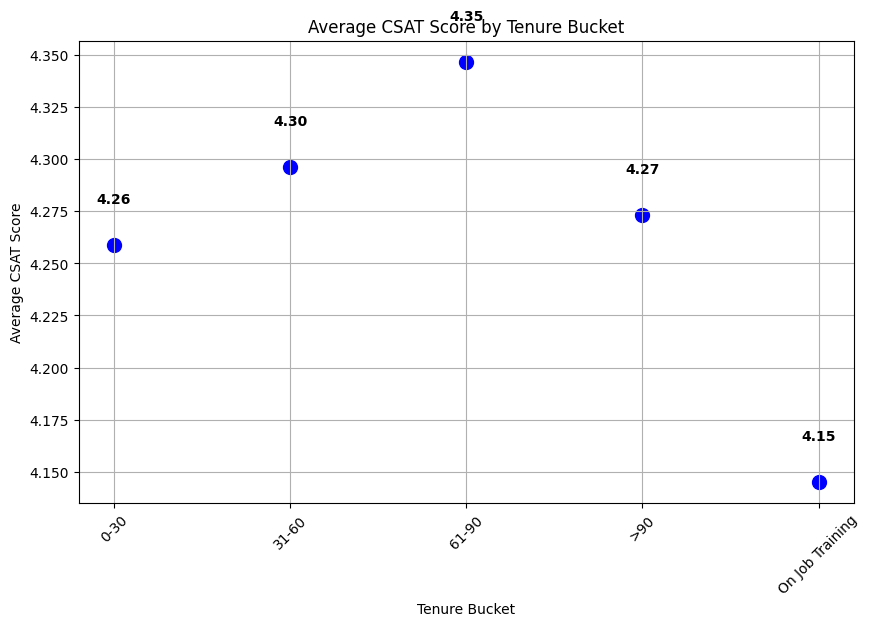

In [ ]:
# Chart - 8 visualization code
# Calculate the average CSAT Score by Tenure Bucket
Score_by_tenure = data.groupby('Tenure Bucket')['CSAT Score'].mean().reset_index()

# Plotting the scatter plot for average CSAT score by Tenure Bucket
plt.figure(figsize=(10, 6))
plt.scatter(Score_by_tenure['Tenure Bucket'], Score_by_tenure['CSAT Score'], color='blue', s=100)

# Adding annotations for each point
for i in range(Score_by_tenure.shape[0]):
    plt.text(Score_by_tenure['Tenure Bucket'].iloc[i], Score_by_tenure['CSAT Score'].iloc[i] + 0.02,
             f"{Score_by_tenure['CSAT Score'].iloc[i]:.2f}",
             horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.title('Average CSAT Score by Tenure Bucket')
plt.xlabel('Tenure Bucket')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Scatter Plots can be a great way to plot distribution or averages across categories.

##### 2. What is/are the insight(s) found from the chart?

Employees who completed tenure of 61-90 days shows higher performance in terms of CSAT Score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Agents/employees who completed tenure greater than 60 days perform well hence company can manage resources accordingly.

#### Chart - 9 - Average CSAT Score by Agent Shift

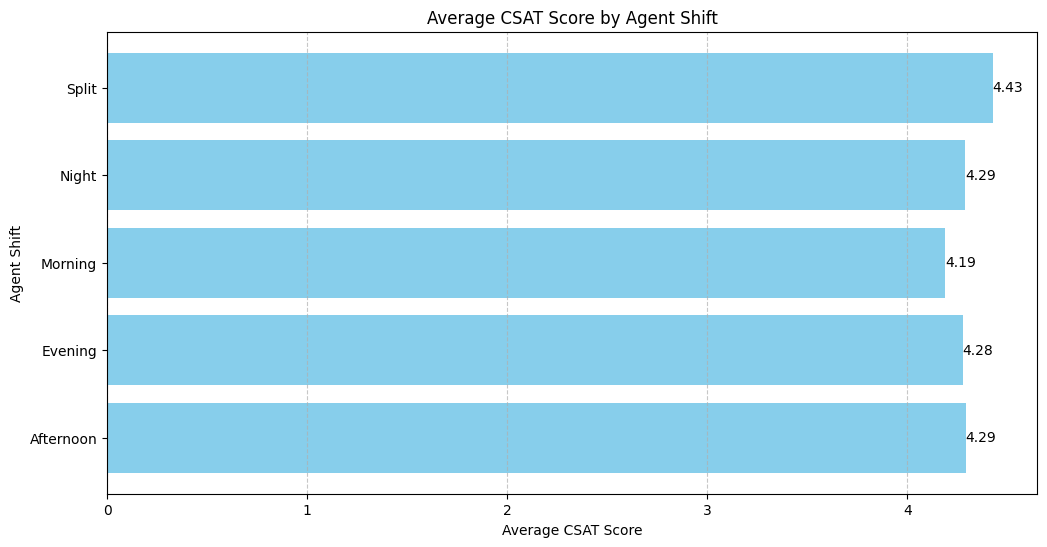

In [ ]:
# Chart - 9 visualization code
# Calculate the average CSAT Score by Agent Shift
Score_by_shift = data.groupby('Agent Shift')['CSAT Score'].mean().reset_index()

# Plotting the horizontal bar plot for average CSAT score by Agent Shift
plt.figure(figsize=(12, 6))
bars = plt.barh(Score_by_shift['Agent Shift'], Score_by_shift['CSAT Score'], color='skyblue')

# Adding annotations for each bar
for index, value in enumerate(Score_by_shift['CSAT Score']):
    plt.text(value, index, f"{value:.2f}", va='center', ha='left', fontsize=10, color='black')

plt.title('Average CSAT Score by Agent Shift')
plt.xlabel('Average CSAT Score')
plt.ylabel('Agent Shift')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adding gridlines for better readability
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar graphs can visualise categorical varibles in better way.

##### 2. What is/are the insight(s) found from the chart?

Agent who work on splitted shift on an average perform better in terms of CSAT Score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Company can deploy resources accordingly.

#### Chart - 14 - Correlation Heatmap

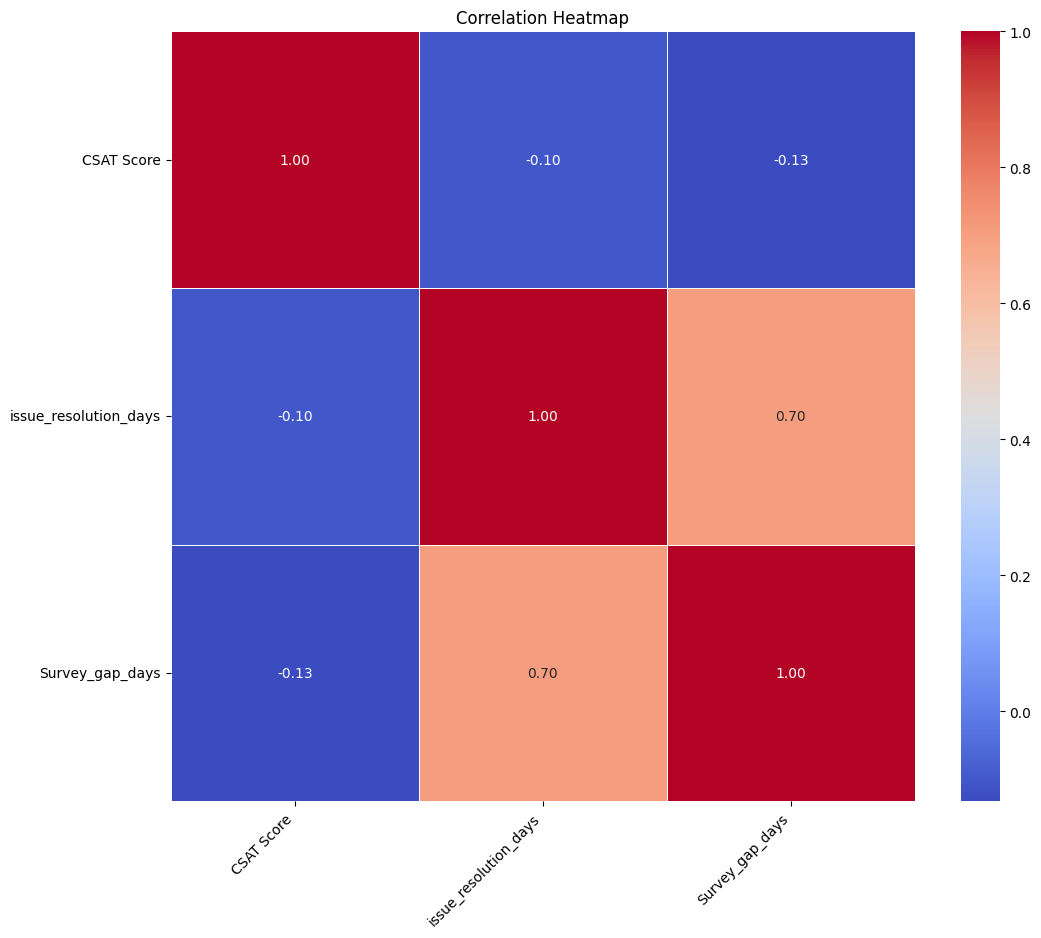

In [ ]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})

# Add title and axis labels
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap is most widely used to visualise correlation between two variables.

##### 2. What is/are the insight(s) found from the chart?

There is only one numerical column in dataset.

#### Chart - 15 - Pair Plot

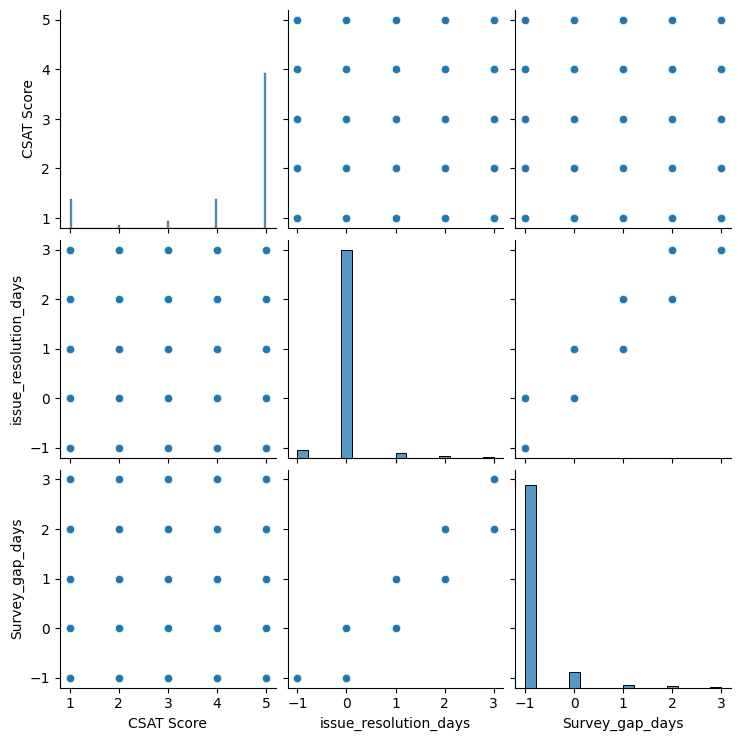

In [ ]:
# Pair Plot visualization code
# Plotting the pair plot
sns.pairplot(data)
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):** There is no significant difference in the average CSAT scores between morning and evening agent shifts.

**Alternative Hypothesis (H₁):** The average CSAT scores differ significantly between morning and evening agent shifts.

#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy.stats as stats
# Perform Statistical Test to obtain P-Value
# Separate CSAT scores for morning and evening shifts
morning_csat = data[data['Agent Shift'] == 'Morning']['CSAT Score']
evening_csat = data[data['Agent Shift'] == 'Evening']['CSAT Score']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(morning_csat, evening_csat)

# Print the p-value
print("P-value:", p_value)

P-value: 1.5180343953890737e-17


Given that this p-value is extremely small (much smaller than a typical significance level of 0.05), we would reject the null hypothesis. Therefore, we have sufficient evidence to conclude that there is a significant difference in the average CSAT scores between morning and evening agent shifts.

##### Which statistical test have you done to obtain P-Value?

Two sample t-test was used to calculate p-value.

##### Why did you choose the specific statistical test?

Because it is widely used method to get p-value.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):** There is no significant correlation between the tenure of agents and their average CSAT scores.

**Alternative Hypothesis (H₁):** There is a significant correlation between the tenure of agents and their average CSAT scores.

#### 2. Perform an appropriate statistical test.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode 'Tenure Bucket' using label encoding
label_encoder = LabelEncoder()
data['Tenure Bucket Encoded'] = label_encoder.fit_transform(data['Tenure Bucket'])

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(data['Tenure Bucket Encoded'], data['CSAT Score'])

# Print the correlation coefficient and p-value
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: -0.030608324716793766
P-value: 2.879182364404216e-19


In [ ]:
# prompt: data.drop['Tenure Bucket Encoded']

data.drop('Tenure Bucket Encoded', axis=1, inplace=True)


p value is significantly smaller than 0.05 signifiance level hence null hypothesis is rejected.

##### Which statistical test have you done to obtain P-Value?

Pearson's correlation coefficient test was used.

##### Why did you choose the specific statistical test?

It is one of the widely used statistical test for hypothesis testing.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
data.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score',
       'issue_resolution_days', 'Survey_gap_days'],
      dtype='object')

In [ ]:
# Define the mapping
mapping = {
    -1: 'very quick',
    0: 'very quick',
    1: 'quick',
    2: 'quick',
    3: 'slow'
}

# Apply the mapping
data['issue_resolution_category'] = data['issue_resolution_days'].map(mapping)

# Delete the original column
data.drop('issue_resolution_days', axis=1, inplace=True)

#### 2. Feature Selection

In [ ]:
data.drop(['Agent_name', 'Supervisor', 'Manager', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Survey_gap_days', 'Sub-category'], axis=1, inplace=True)

In [ ]:
data.head(2)

,channel_name,category,Tenure Bucket,Agent Shift,CSAT Score,issue_resolution_category
0,Outcall,Product Queries,On Job Training,Morning,5,very quick
1,Outcall,Product Queries,>90,Morning,5,very quick


Also dropping person specific columns like Agent_name, Supervisor and Manager

##### What all feature selection methods have you used  and why?

1) Dropped agent name, manager name and supervisor name as name specific analysis would cause model to overfit.

2) created new feature as issue resolution days from issue responded and issue reported, which is more relevent here.

3) hence dropping all the date columns.

4) Survey gap days contains mostly negetive values hence dropping it as well.

##### Which all features you found important and why?

From above data we can observe that all selected features are somewhat important while subcategory seems to be more important.

### 2. Categorical Encoding

In [ ]:
data = pd.get_dummies(data, columns=['channel_name', 'category', 'Agent Shift', 'Tenure Bucket', 'issue_resolution_category'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Used label encoding for tenure bucket as it is ordinal category while one-hot encoding for the rest.

### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
# Split your data to train and test. Choose Splitting ratio wisely.
# Define features (X) and target variable (y)
X = data.drop(columns=['CSAT Score'])
y = data['CSAT Score']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### What data splitting ratio have you used and why?

70:30 ratio was used for training: testing data as it will provide sufficient data for testing.

## ***7. ML Model Implementation***

### ML Model - 1 - DecisionTreeClassifier

In [ ]:
# ML Model - 1 Implementation
# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluate the model
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.02      0.04      3321
           2       0.00      0.00      0.00       350
           3       0.00      0.00      0.00       790
           4       0.14      0.00      0.00      3409
           5       0.70      0.99      0.82     17903

    accuracy                           0.69     25773
   macro avg       0.22      0.20      0.17     25773
weighted avg       0.54      0.69      0.57     25773



### ML Model - 2 - Deep Learning - ANN

In [ ]:
from tensorflow.keras.utils import to_categorical
# Convert target variable to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Check the shape after conversion to categorical
print(f"y_train shape after to_categorical: {y_train.shape}")
print(f"y_test shape after to_categorical: {y_test.shape}")

# Define the ANN model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(16, activation='relu'))  # Hidden layer with 16 neurons
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer with neurons equal to number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Evaluate the classifier
accuracy = accuracy_score(y_test_classes, y_pred_classes)
report = classification_report(y_test_classes, y_pred_classes)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

y_train shape after to_categorical: (60134, 6)
y_test shape after to_categorical: (25773, 6)
Epoch 1/50
4811/4811 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.6915 - loss: 0.9829 - val_accuracy: 0.6929 - val_loss: 0.9524
Epoch 2/50
4811/4811 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6913 - loss: 0.9449 - val_accuracy: 0.6933 - val_loss: 0.9465
Epoch 3/50
4811/4811 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6919 - loss: 0.9460 - val_accuracy: 0.6930 - val_loss: 0.9482
Epoch 4/50
4811/4811 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6950 - loss: 0.9395 - val_accuracy: 0.6931 - val_loss: 0.9490
Epoch 5/50
4811/4811 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6965 - loss: 0.9356 - val_accuracy: 0.6932 - val_loss: 0.9484
Epoch 6/50
4811/4811 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6972 - loss: 0.9331 - val_accuracy: 0.6933 - val_loss: 0.9482
Epoch 9/50
4811/4811 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6936 - loss: 0.9398 - val_accuracy: 0.6933 - val_loss

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Convert predicted probabilities to classes
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Compute precision
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')

# Compute recall
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')

# Compute F1-score
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Generate classification report
report = classification_report(y_test_classes, y_pred_classes)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.69
Precision: 0.56
Recall: 0.69
F1-score: 0.57
Classification Report:
              precision    recall  f1-score   support

           1       0.42      0.01      0.03      3321
           2       0.00      0.00      0.00       350
           3       0.00      0.00      0.00       790
           4       0.15      0.00      0.00      3409
           5       0.70      1.00      0.82     17903

    accuracy                           0.69     25773
   macro avg       0.25      0.20      0.17     25773
weighted avg       0.56      0.69      0.57     25773



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy is considered for positive business impact as it is on higher side we can predict CSAT Score using this value.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Deep learning ML model is finalised because of its slightly better performance on data training and testing.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

The Deep learning model performs well in predicting class 5 (CSAT Score 5) due to its high precision, recall, and F1-score.

However, the model's performance is poor for classes 1, 2, 3, and 4, as indicated by low precision, recall, and F1-score values for these classes.

Overall, the model may need further optimization, such as data balancing techniques, feature engineering, or hyperparameter tuning, to improve its performance, especially for minority classes. Additionally, it's essential to consider the business context and consequences of misclassification for each class when interpreting the results and deciding on further actions.

**Recommondations:**

1) How quickly issue is resolved affetcs significantly to customer satisfaction score hence focus should be given on resolving customer problems as soon as possible.

2) Well trained and experienced agents can handle customers better hence focus should be on training and hiring experiened agents which can improve CSAT Score.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***